In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from scipy import misc
import scipy.ndimage as sn


TESTPATH = '//home/izinizik/kagle_twarz/dane/test.csv'

In [2]:
#use_cuda = torch.cuda.is_available()
use_cuda = False
device = torch.device("cuda:0" if use_cuda else "cpu")
dtype = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

In [3]:
df_test = pd.read_csv(TESTPATH)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [5]:
df_test['Image'] = df_test['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [6]:
X = np.vstack(df_test['Image'].values)/ 255

In [7]:
def plot_sample(images_array, dim=1, key=np.empty([10000,0]), key_pred=np.empty([10000,0])):
    
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    sample = np.random.choice(len(images_array), dim*dim, replace=False)
    for i in range(dim*dim):
        ax = fig.add_subplot(dim, dim, i + 1, xticks=[], yticks=[])
        ax.imshow(images_array[sample[i]].reshape(96,96), cmap='gray')
        ax.scatter(key[sample[i],0::2], key[sample[i],1::2], s=20, marker='.', c='red')
        ax.scatter(key_pred[sample[i],0::2], key_pred[sample[i],1::2], s=20, marker='.', c='blue')

In [8]:
class ConvNet(nn.Module):

    def __init__(self):

        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        
        self.drop1 = nn.Dropout(p = 0.1)
        self.drop2 = nn.Dropout(p = 0.1)
        self.drop3 = nn.Dropout(p = 0.1)
        self.drop4 = nn.Dropout(p = 0.2)
        self.drop5 = nn.Dropout(p = 0.2)
        
        self.fc1 = nn.Linear(in_features=32*3*3, out_features=30)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
      
    def forward(self, x):
        
        x = self.drop1(self.pool(F.relu(self.conv1(x))))
        x = self.drop2(self.pool(F.relu(self.conv2(x))))
        x = self.drop3(self.pool(F.relu(self.conv3(x))))
        x = self.drop4(self.pool(F.relu(self.conv4(x))))
        x = self.drop5(self.pool(F.relu(self.conv5(x))))
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)

        return(x)

In [9]:
convnet = ConvNet().to(device)

In [10]:
convnet.load_state_dict(torch.load('full.h5'))

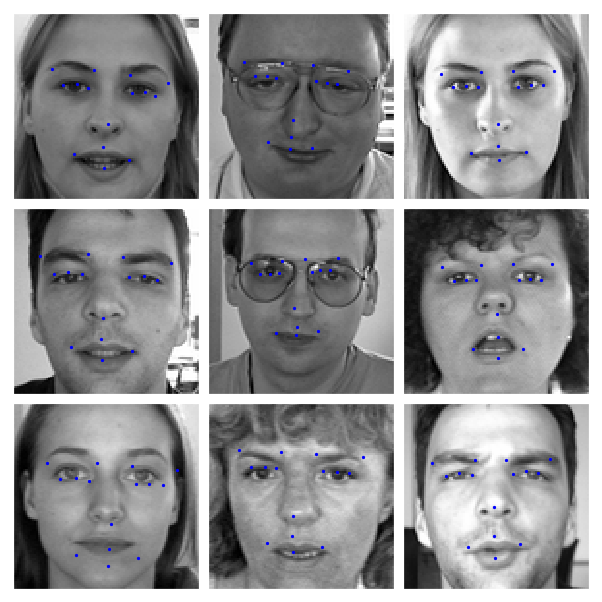

In [11]:
y_pred = convnet(torch.tensor(X[:50]).float().reshape(-1,1,96,96)).detach().numpy()
plot_sample(X[:50], dim=3, key_pred=y_pred) 

In [21]:
r2_score

(1783, 2)